In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('./data/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

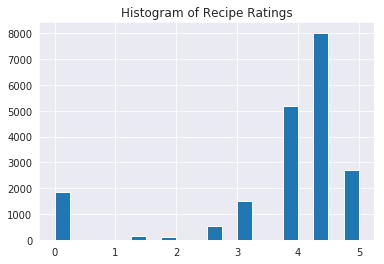

In [5]:
sns.set_style("darkgrid")

raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
# svr = SVR(gamma='auto')
# X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
# Y = raw_data.rating
# svr.fit(X,Y)

# plt.scatter(Y, svr.predict(X))

In [8]:
# svr.score(X, Y)

In [9]:
# cross_val_score(svr, X, Y, cv=5)

In [10]:
df = raw_data.dropna()

In [11]:
dummy = pd.get_dummies((df.rating >= 3), prefix='high_rating', drop_first=True)

In [12]:
df = pd.concat([df, dummy], axis=1)
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,high_rating_True
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [13]:
# X = df[['calories', 'protein', 'fat', 'sodium']]
# Y = df.high_rating_True

# svr.fit(X,Y)

In [14]:
# plt.scatter(Y, svr.predict(X))

In [15]:
# svr.score(X, Y)

In [16]:
# cross_val_score(svr, X, Y, cv=5)

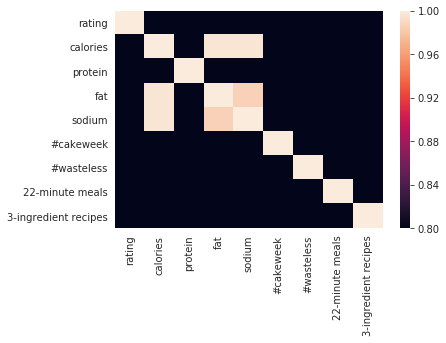

In [17]:
g = sns.heatmap(df.iloc[:, :10].corr(), vmin= 0.8)

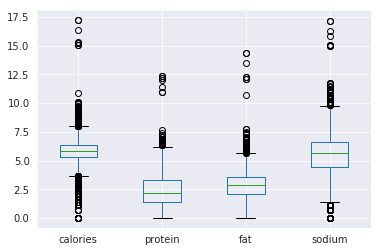

In [18]:
np.log(df[['calories', 'protein', 'fat', 'sodium']]+1).boxplot()

In [19]:
features = np.log(df[['calories', 'protein', 'fat', 'sodium']]+1)

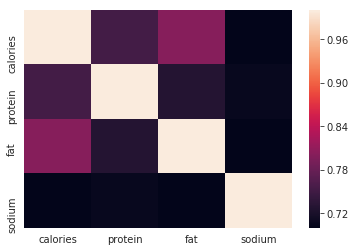

In [20]:
g = sns.heatmap(features.corr(), vmin= 0.7)

# Fat protein and calories are correlated, but use PCA to reduce others

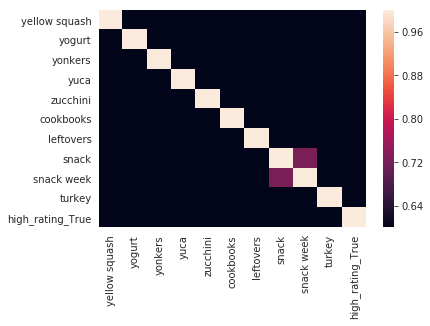

In [21]:
g = sns.heatmap(df.iloc[:, 670:].corr(), vmin= 0.6)

In [22]:
#count % of zeros
(df[df == 0].count()/df.count()).sort_values()

title                      0.000000
calories                   0.000504
sodium                     0.003278
protein                    0.052068
fat                        0.076778
rating                     0.081694
high_rating_True           0.120083
bon appétit                0.534607
peanut free                0.576336
soy free                   0.590141
gourmet                    0.641768
tree nut free              0.645991
vegetarian                 0.651475
kosher                     0.685767
pescatarian                0.692637
quick & easy               0.734556
wheat/gluten-free          0.754097
bake                       0.765192
summer                     0.795134
dessert                    0.813918
winter                     0.837305
side                       0.838502
fall                       0.842410
dairy free                 0.843041
no sugar added             0.847579
kidney friendly            0.878782
sugar conscious            0.879223
dinner                     0

In [23]:
df.count()

title                    15864
rating                   15864
calories                 15864
protein                  15864
fat                      15864
sodium                   15864
#cakeweek                15864
#wasteless               15864
22-minute meals          15864
3-ingredient recipes     15864
30 days of groceries     15864
advance prep required    15864
alabama                  15864
alaska                   15864
alcoholic                15864
almond                   15864
amaretto                 15864
anchovy                  15864
anise                    15864
anniversary              15864
anthony bourdain         15864
aperitif                 15864
appetizer                15864
apple                    15864
apple juice              15864
apricot                  15864
arizona                  15864
artichoke                15864
arugula                  15864
asian pear               15864
                         ...  
wasabi                   15864
washingt

In [24]:
(df[df == 0].count()).sort_values()[:50].index.values

array(['title', 'calories', 'sodium', 'protein', 'fat', 'rating',
       'high_rating_True', 'bon appétit', 'peanut free', 'soy free',
       'gourmet', 'tree nut free', 'vegetarian', 'kosher', 'pescatarian',
       'quick & easy', 'wheat/gluten-free', 'bake', 'summer', 'dessert',
       'winter', 'side', 'fall', 'dairy free', 'no sugar added',
       'kidney friendly', 'sugar conscious', 'dinner', 'onion',
       'milk/cream', 'sauté', 'tomato', 'vegetable', 'fruit', 'vegan',
       'egg', 'herb', 'kid-friendly', 'garlic', 'spring', 'healthy',
       'dairy', 'thanksgiving', 'salad', 'cheese', 'chicken', 'appetizer',
       'roast', 'no-cook', 'soup/stew'], dtype=object)

In [25]:
X = df[(df[df == 0].count()).sort_values()[:30].index.values].drop(['title', 'rating', 'high_rating_True'], 1)
Y = df.high_rating_True

In [26]:
%time

svc = SVC(gamma='auto')
svc.fit(X,Y)
display(svc.score(X, Y))
display(cross_val_score(svc, X, y=Y, cv=5))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


0.9621154815935451

array([0.89221557, 0.89284589, 0.89284589, 0.89158525, 0.88965952])